In [1]:
%matplotlib inline
%pylab inline

from functools import partial

import menpo.io as mio
from menpo.feature import imgfeature, fast_dsift

from menpo.landmark import labeller, ibug_face_68_trimesh
from menpo.visualize import visualize_images
from menpofit.aam import HolisticAAM

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
@imgfeature
def fast_dsift2(image):
    if image.n_channels == 3:
        image = image.as_greyscale(mode='average')
    return fast_dsift(image)

## Load training data

In [3]:
training_images = []
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/lfpw/trainset/', 
                           verbose=True, max_images=None):
    i = i.rescale_landmarks_to_diagonal_range(200)
    i = i.crop_to_landmarks_proportion(0.5)
    labeller(i, 'PTS', ibug_face_68_trimesh)
    if i.n_channels == 3:
        training_images.append(i)
        
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/helen/trainset/', 
                           verbose=True, max_images=None):
    i = i.rescale_landmarks_to_diagonal_range(200)
    i = i.crop_to_landmarks_proportion(0.5)
    labeller(i, 'PTS', ibug_face_68_trimesh)
    if i.n_channels == 3:
        training_images.append(i)

Importing assets: [==========] 100% (811/811) - done.                           
Importing assets: [==========] 100% (2000/2000) - done.                         


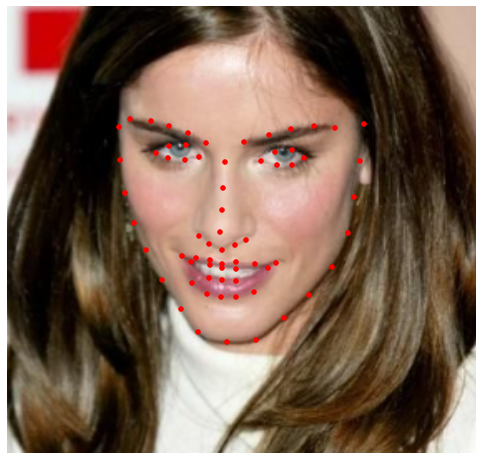

In [4]:
visualize_images(training_images)

## Build and save Active Appearance Model

In [5]:
features = fast_dsift2
diagonal = 150
scales = (0.5, 1)
max_shape_components= 0.9
max_appearance_components = 0.9

#### AAM

In [6]:
aam = HolisticAAM(
    training_images, 
    group='ibug_face_68_trimesh', 
    verbose=True,
    features=features,
    diagonal=diagonal,
    scales=scales,
    max_shape_components=max_shape_components,
    max_appearance_components=max_appearance_components)

Computing batch 0
- Building models
  - Scale 0: Done
  - Scale 1: Done


/Users/joan/pythondev/src/menpo/menpo/image/boolean.py:580: MenpoDeprecationWarning: trilist parameter is deprecated and is being ignored. Please provide a Trimesh instead of relying on this parameter.
  'relying on this parameter.', MenpoDeprecationWarning)


In [7]:
mio.export_pickle(aam, '/Users/joan/PhD/Results/alabort_aam_2015/aam_scaled.pkl.gz', overwrite=True)